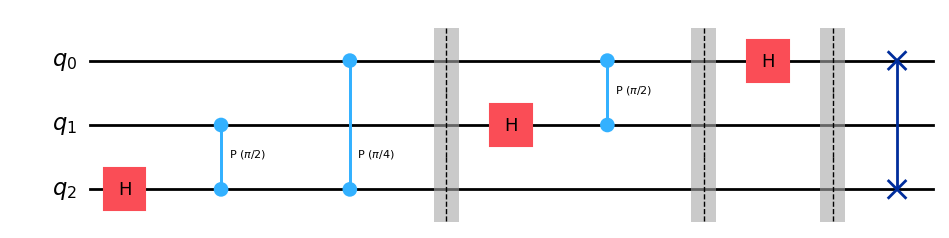

In [215]:
from qiskit.circuit.library import QFT
from qiskit.quantum_info import Statevector
from qiskit import QuantumCircuit

# number of qubits
num = 3
do_swaps = True
qc = QFT(num, 0, True, False, True)
qc.decompose().draw('mpl')

In [216]:
# initalize a state with [1 0 0 ... 0]
init = []
for i in range(2**num):
    if i == 0:
        init.append(1)
    else:
        init.append(0)
v = Statevector(init)
v.draw("latex")


<IPython.core.display.Latex object>

In [217]:

vf = v.evolve(qc)
vf.draw("latex")



<IPython.core.display.Latex object>

See [1] T. G. Draper, “Addition on a quantum computer,” arXiv:quant-ph/0008033v1 (2000).

QFT Adder


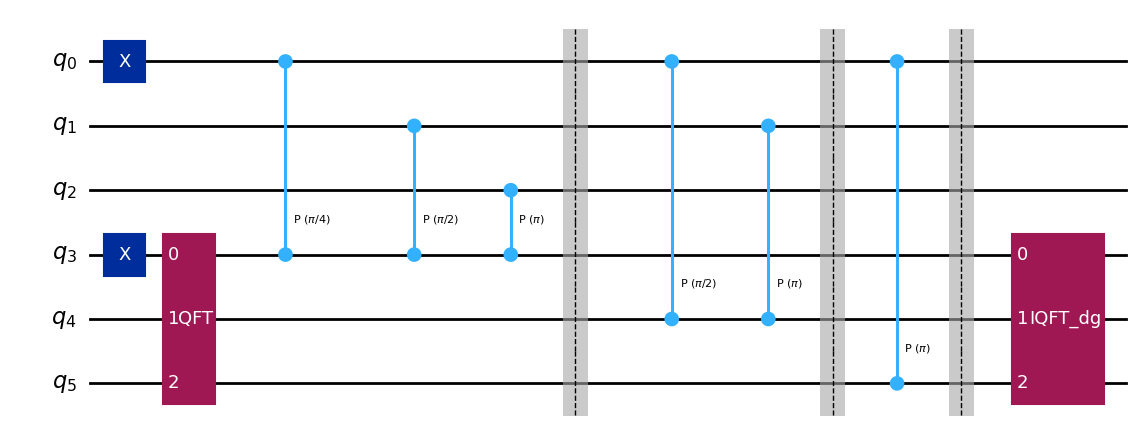

In [218]:
import numpy as np
# usage example of QFT
circuit = QuantumCircuit(6)

# b=001 (q_2 q_1 q_0)
# a=001 (q_5 q_4 q_3)
circuit.x(0)
circuit.x(3)

qc2 = QFT(3, 0, do_swaps=True, inverse=False)

qc3 = QFT(3, 0, do_swaps=True, inverse=True) 

circuit = circuit.compose(qc2, [3,4,5])



circuit.cp(np.pi/4, 0, 3)
circuit.cp(np.pi/2, 1, 3)
circuit.cp(np.pi, 2, 3)
circuit.barrier()
circuit.cp(np.pi/2, 0, 4)
circuit.cp(np.pi, 1, 4)


circuit.barrier()
circuit.cp( np.pi,0, 5)
circuit.barrier()
circuit = circuit.compose(qc3, [3,4,5])
circuit.draw('mpl')


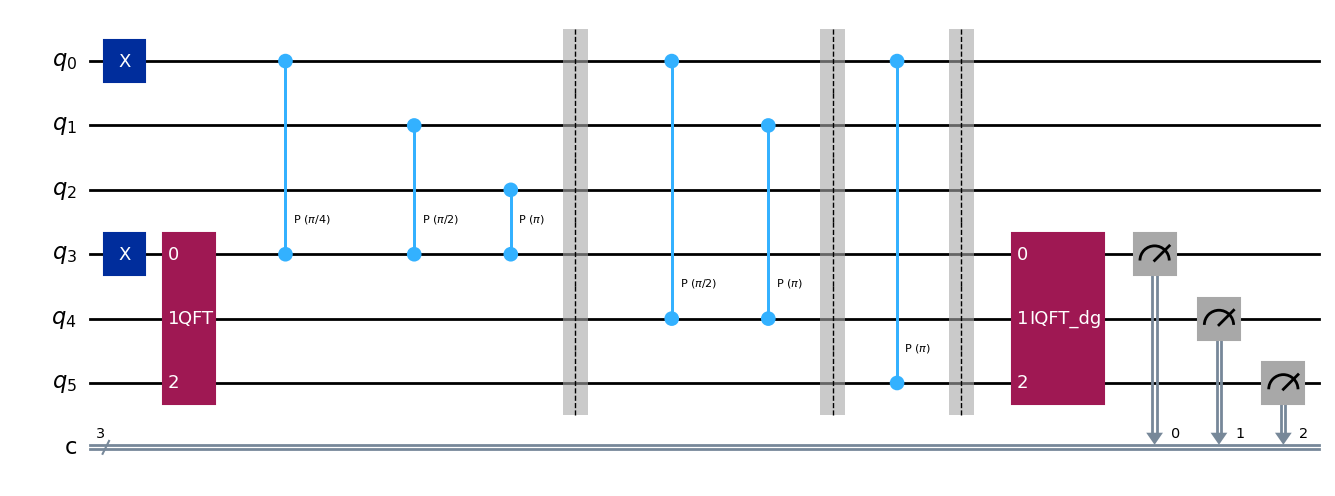

In [219]:
meas = QuantumCircuit(6, 3)
# map the quantum measurement to the classical bits
meas.measure([3,4,5], [0,1,2])
# The Qiskit circuit object supports composition.
# Here the meas has to be first and front=True (putting it before)
# as compose must put a smaller circuit into a larger one.
qc = meas.compose(circuit, range(6), front=True)
qc.draw('mpl')

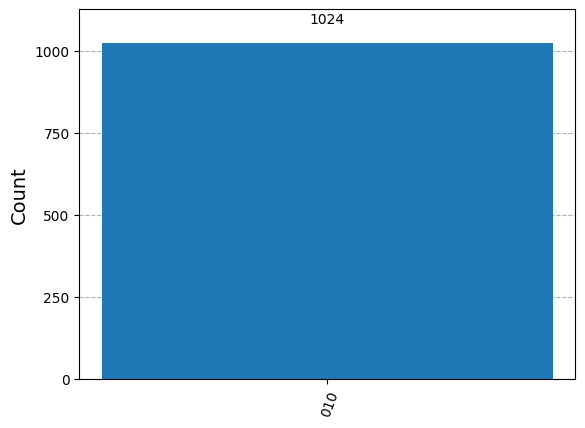

In [220]:
# Adding the transpiler to reduce the circuit to QASM instructions
# supported by the backend
from qiskit import transpile
# Use AerSimulator
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

backend = AerSimulator()
# First we have to transpile the quantum circuit
# to the low-level QASM instructions used by the
# backend
qc_compiled = transpile(qc, backend)
# Execute the circuit on the qasm simulator.
# We've set the number of repeats of the circuit
# to be 1024, which is the default.
job_sim = backend.run(qc_compiled, shots=1024)
# Grab the results from the job.
result_sim = job_sim.result()
counts = result_sim.get_counts(qc_compiled)
plot_histogram(counts)